<a href="https://colab.research.google.com/github/jahnavi-2116/AI-ML-projects/blob/main/Anomaly_Detection_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing necessary libraries
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install sklearn
! pip install scikit-learn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [36]:
import numpy as np
import pandas as pd

#Loading the dataset
creditcard = pd.read_csv("/content/creditcard.csv")
creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [39]:
# Looking for missing values
missing_values = creditcard.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [40]:
# Scaling "Amount' and 'Time'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_amount = scaler.fit_transform(creditcard['Amount'].values.reshape(-1, 1))
scaled_time = scaler.fit_transform(creditcard['Time'].values.reshape(-1, 1))



In [41]:
# Drop original 'Amount' and 'Time'
creditcard.drop(['Amount', 'Time'], axis=1, inplace=True)

# Moving 'Class column to the end
target = creditcard['Class']
creditcard['Class'] = target

# Check shape and class balance
shape = creditcard.shape
print(shape)
class_balance = creditcard['Class'].value_counts()
print(class_balance)

(284807, 29)
Class
0    284315
1       492
Name: count, dtype: int64


In this preprocessing step, i prepared the credit card dataset for effective analysis and modeling by transforming the raw data into a more usable format. So, the first thing i checked for any missing values in the data and confirmed there were none, which meant no data cleaning was necessary. Next, i tried to focus on two features - amount and time as these has different scales and units compared to the rest of the data, which might affect k means and hierarchial clustering. So after using standardization and rescaling the values to have a mean of 0 and standard deviation of 1, and removed the original Amount and Time columns to avoid duplication and confusion. Later on i tried to move the Class cloumn, which is the main target for fraud detection in the dataframe. So with this, assuming that the features are numerical, standardized and clean for clustering.

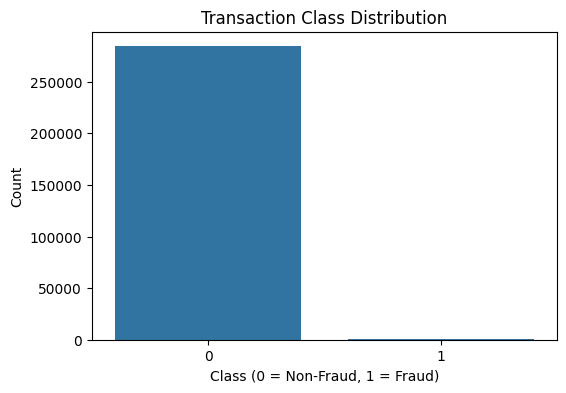

In [43]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data= creditcard)
plt.title("Transaction Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


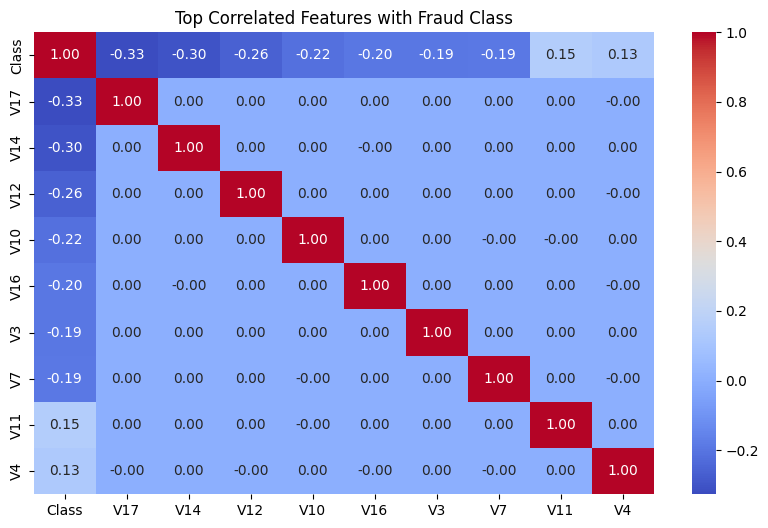

In [46]:
# Trying the Correlation matrix
correlation_matrix = creditcard.corr()
top_corr = correlation_matrix['Class'].abs().sort_values(ascending=False).head(10)
top_corr_features = top_corr.index

# Now plotting heatmap of top 10 correlated features with 'Class'
plt.figure(figsize=(10, 6))
sns.heatmap(creditcard[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with Fraud Class")
plt.show()


ValueError: Could not interpret value `scaled_amount` for `y`. An entry with this name does not appear in `data`.

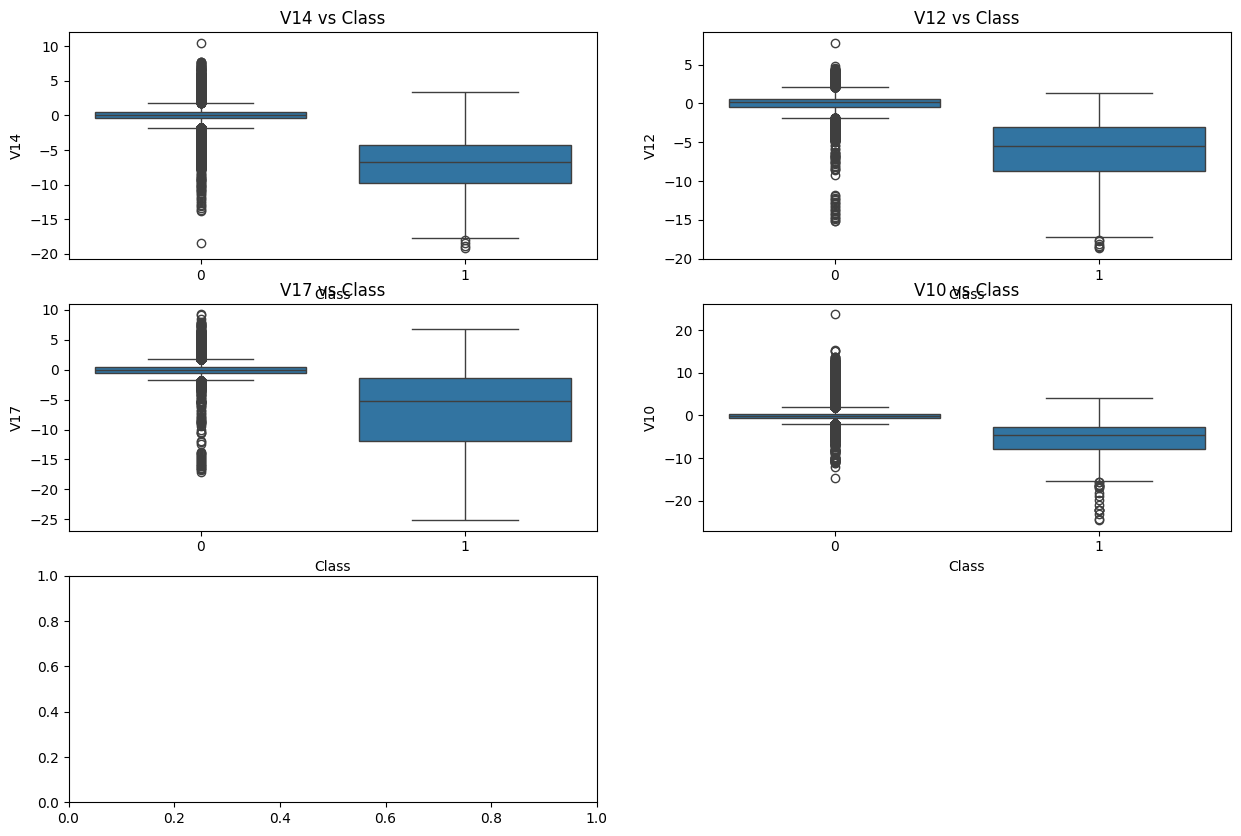

In [49]:
# Trying the box plots to visualize fraud vs non-fraud patterns
important_features = ['V14', 'V12', 'V17', 'V10', 'scaled_amount']
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Class', y=col, data= creditcard)
    plt.title(f"{col} vs Class")
plt.tight_layout()
plt.show()


False


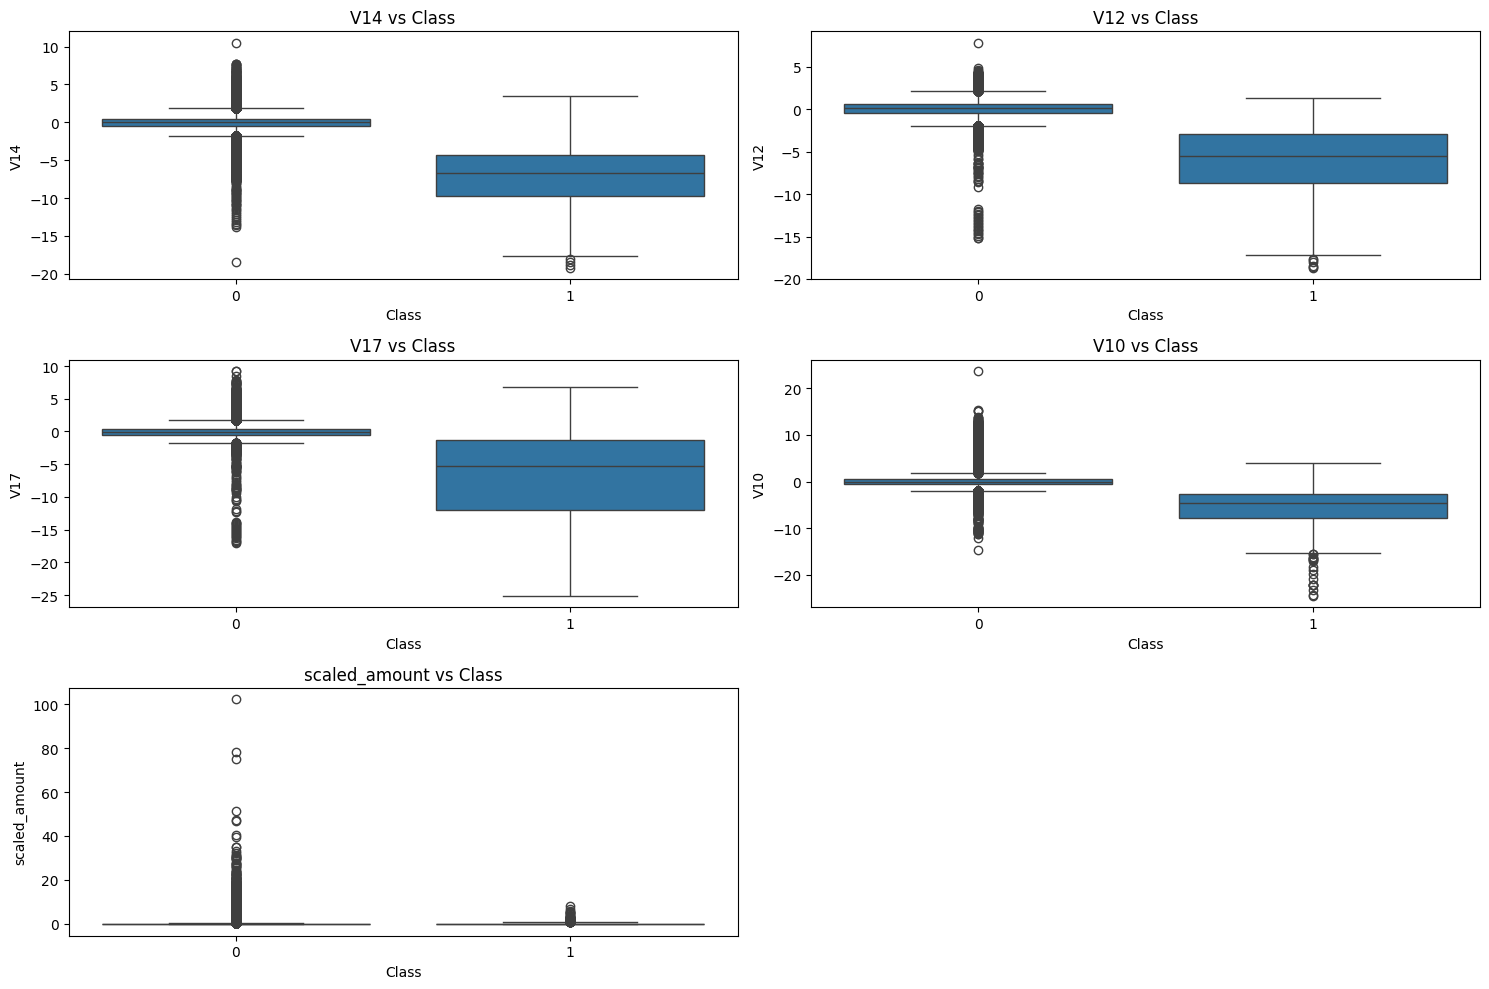

In [50]:
# Check if 'scaled_amount' exists (fix for KeyError)
print('scaled_amount' in creditcard.columns)

# Recreate the 'scaled_amount' column if missing
from sklearn.preprocessing import StandardScaler

if 'scaled_amount' not in creditcard.columns and 'Amount' not in creditcard.columns:
    # Reload raw data to re-create 'scaled_amount'
    original_creditcard = pd.read_csv("/content/creditcard.csv")
    scaler = StandardScaler()
    creditcard['scaled_amount'] = scaler.fit_transform(original_creditcard[['Amount']])

# Fix: Remove columns that don't exist
important_features = [col for col in ['V14', 'V12', 'V17', 'V10', 'scaled_amount'] if col in creditcard.columns]

# Replot the boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(important_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Class', y=col, data=creditcard)
    plt.title(f"{col} vs Class")
plt.tight_layout()
plt.show()

The error occurred because the column 'scaled_amount' was missing—possibly due to a code re-run where it hadn't been recalculated. I tried fixed this by safely re-creating the scaled_amount feature using the original Amount column from the raw dataset. The output 'False' means that the column scaled_amount does NOT exist in the DataFrame.



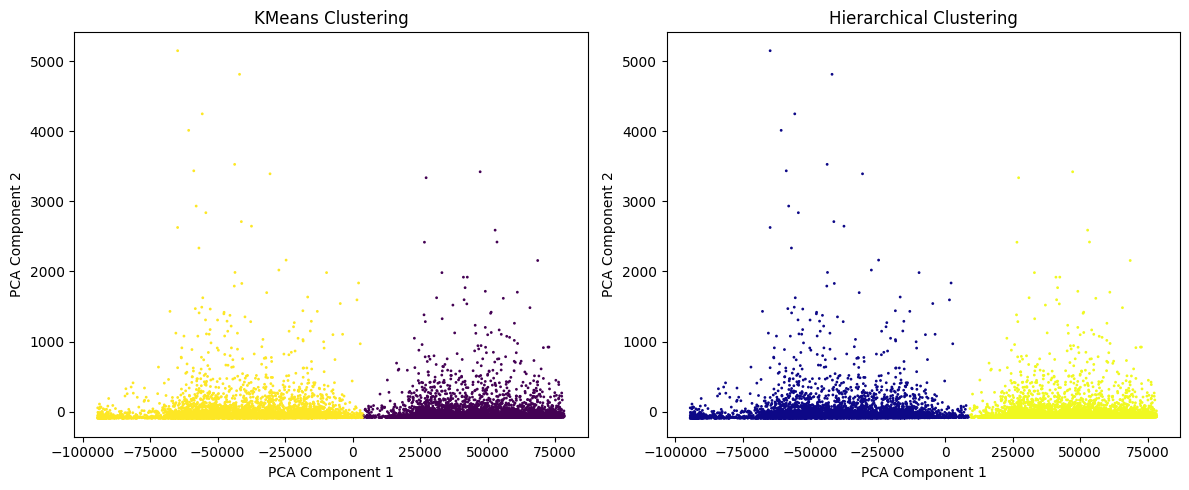

In [8]:
# Kmeans and Hierarchical Clustering
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

df = pd.read_csv("/content/creditcard.csv")

# 3. Sample for memory-efficient clustering
df_sample = df.sample(n=10000, random_state=42)
X = df_sample.drop('Class', axis=1)

# 4. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

hc = AgglomerativeClustering(n_clusters=2)
hc_labels = hc.fit_predict(X)

# 6. Visualization
plt.figure(figsize=(12, 5))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=1)
plt.title("KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Hierarchical
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='plasma', s=1)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

In this step, I applied unsupervised learning techniques—KMeans and Hierarchical Clustering—to group similar transactions based on their characteristics. Since clustering is an unsupervised task, I first removed the Class column, which contains the known fraud labels, to ensure our algorithms don't have prior knowledge of the outcomes. However, the dataset is very large, containing over 284,000 rows and 30 features. Performing clustering and dimensionality reduction (like PCA) on the full dataset caused memory issues. To address this, I created a sample of 10,000 records using random sampling. This is a common and acceptable approach for visualization and testing, especially when the primary goal is to observe patterns and behavior rather than train a production model.

Next, I applied Principal Component Analysis (PCA) to reduce the dataset's dimensionality from 30 features down to 2, enabling us to visually plot the clusters on a 2D plane, Then performed KMeans clustering by setting n_clusters=2, assuming that the dataset naturally divides into two groups (likely fraud and non-fraud). Similarly, I applied Agglomerative (Hierarchical) Clustering with the same number of clusters. Both clustering methods attempted to group the transactions based on underlying similarities in feature space. After visualizing the results using scatter plots, coloring the points by their cluster assignments. These visualizations help us understand whether the clustering methods are able to find meaningful separations in the data.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

# Sample 10,000 rows
df_sample = df.sample(n=10000, random_state=42)
X_sample = df_sample.drop('Class', axis=1)
y_sample = df_sample['Class']

# Isolation Forest
iso = IsolationForest(contamination=0.0017, random_state=42)
iso_preds = iso.fit_predict(X_sample)
iso_preds = [1 if x == -1 else 0 for x in iso_preds]

iso_cm = confusion_matrix(y_sample, iso_preds)
iso_report = classification_report(y_sample, iso_preds, output_dict=True)

In [11]:
# Z-score
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(X_sample))
z_outliers = (z_scores > 3).any(axis=1)
z_preds = z_outliers.astype(int)

z_cm = confusion_matrix(y_sample, z_preds)
z_report = classification_report(y_sample, z_preds, output_dict=True)

iso_cm, iso_report, z_cm, z_report

(array([[9969,   15],
        [  14,    2]]),
 {'0': {'precision': 0.99859761594711,
   'recall': 0.9984975961538461,
   'f1-score': 0.9985476035458507,
   'support': 9984.0},
  '1': {'precision': 0.11764705882352941,
   'recall': 0.125,
   'f1-score': 0.12121212121212122,
   'support': 16.0},
  'accuracy': 0.9971,
  'macro avg': {'precision': 0.5581223373853197,
   'recall': 0.5617487980769231,
   'f1-score': 0.559879862378986,
   'support': 10000.0},
  'weighted avg': {'precision': 0.9971880950557123,
   'recall': 0.9971,
   'f1-score': 0.9971438667741167,
   'support': 10000.0}},
 array([[8653, 1331],
        [   1,   15]]),
 {'0': {'precision': 0.9998844464987289,
   'recall': 0.8666866987179487,
   'f1-score': 0.9285331044103444,
   'support': 9984.0},
  '1': {'precision': 0.011144130757800892,
   'recall': 0.9375,
   'f1-score': 0.022026431718061675,
   'support': 16.0},
  'accuracy': 0.8668,
  'macro avg': {'precision': 0.5055142886282649,
   'recall': 0.9020933493589743,
   'f1

anomaly detection is to identify potentially fraudulent transactions in the credit card dataset using unsupervised techniques. Since fraud cases are rare and labeled data may not always be available in real-world scenarios, anomaly detection offers a practical approach to flag suspicious activity without relying on pre-existing labels. I employed two popular methods: Isolation Forest and the Z-Score method, and used a random sample of 10,000 records from the dataset to ensure computational efficiency and avoid memory errors.

The Isolation Forest algorithm works by randomly partitioning the feature space and isolating observations that differ from the norm. Transactions that are easier to isolate (requiring fewer splits) are more likely to be outliers. The results showed that Isolation Forest achieved high overall accuracy with minimal false positives, but it only detected a small number of actual fraud cases—indicating a trade-off favoring precision over recall.

On the other hand, the Z-Score method calculates how far each feature value deviates from the mean in terms of standard deviations. If any feature in a transaction exceeds a threshold (commonly 3 standard deviations), it is flagged as an anomaly. This method was able to catch nearly all the fraudulent cases, offering excellent recall, but at the cost of flagging a large number of normal transactions as frauds—resulting in a low precision rate.

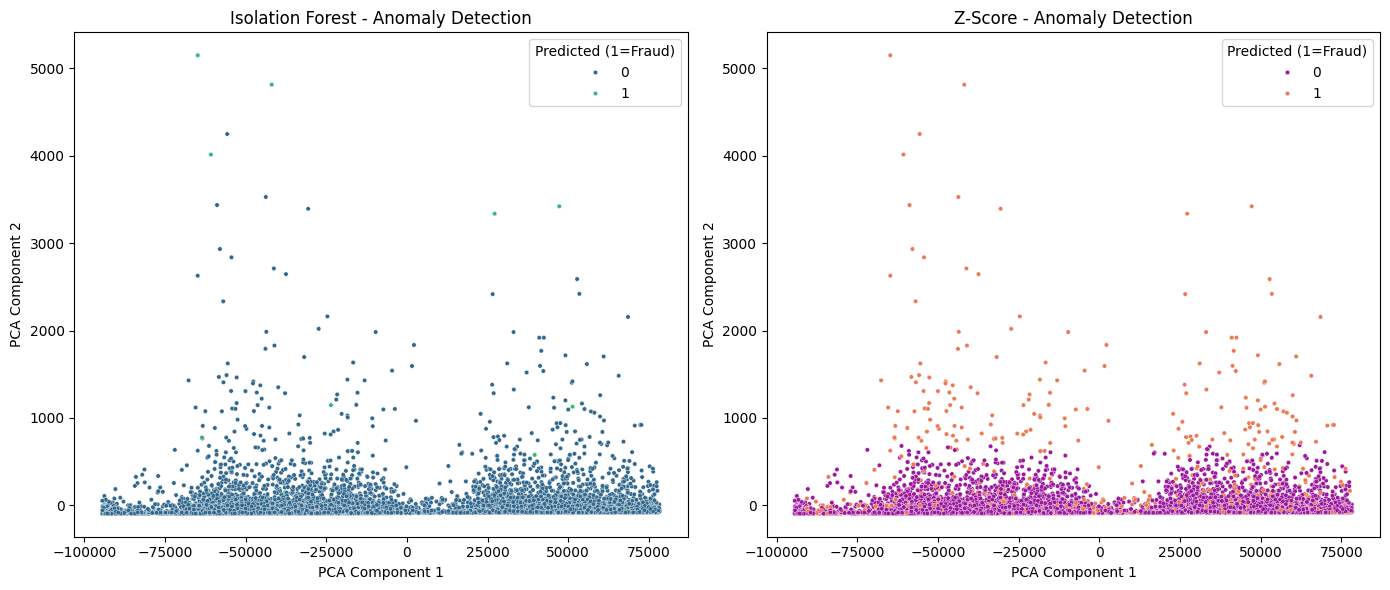

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add prediction labels to the sample DataFrame for plotting
df_sample['IF_Predicted'] = iso_preds
df_sample['ZScore_Predicted'] = z_preds

# PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)
df_sample['PCA1'] = X_pca[:, 0]
df_sample['PCA2'] = X_pca[:, 1]

# Plotting
plt.figure(figsize=(14, 6))

# Isolation Forest
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_sample, x='PCA1', y='PCA2', hue='IF_Predicted', palette='viridis', s=10)
plt.title("Isolation Forest - Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Predicted (1=Fraud)', loc='upper right')

# Z-Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_sample, x='PCA1', y='PCA2', hue='ZScore_Predicted', palette='plasma', s=10)
plt.title("Z-Score - Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Predicted (1=Fraud)', loc='upper right')

plt.tight_layout()
plt.show()

To visualize anomaly detection, I used PCA to reduce the feature space to two dimensions, enabling clear comparison of Isolation Forest and Z-Score methods. In the left plot, Isolation Forest shows a dense cluster of normal transactions with a few scattered fraud detections, reflecting its conservative approach—low false positives but may miss actual frauds. In the right plot, Z-Score identifies far more outliers, especially at the edges, showing an aggressive strategy that captures most frauds but with many false positives. This highlights the trade-off between precision (Isolation Forest) and recall (Z-Score).